# Results

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import os

import utils

mpl.rcParams["figure.dpi"] = 300

## Loading data

In [2]:
results = pd.read_csv("trials_info.csv", encoding="utf-8")
results

,dataset,aggregator,trial,n_layers,optimizer__lr,optimizer__weight_decay,n_head,n_hid,attn_dropout,ff_dropout,...,trainable_params,aggregator__cell,aggregator__hidden_size,aggregator__num_layers,aggregator__dropout,label,valid_loss_opt_ds_agg,valid_loss_opt_ds,test_bacc_ds_agg,test_bacc_ds
0,sylvine,cls,cdb54f36,1,0.000248,0.000949,16,1024,0.127320,0.152395,...,168321,NaN,NaN,NaN,NaN,0,0.125169,0.125169,94.980,95.738
1,sylvine,cls,1c799d54,4,0.000074,0.000002,4,64,0.487195,0.104250,...,1240833,NaN,NaN,NaN,NaN,0,0.125169,0.125169,94.980,95.738
2,sylvine,cls,b116e4fc,2,0.000029,0.000106,8,32,0.323894,0.395807,...,179905,NaN,NaN,NaN,NaN,0,0.125169,0.125169,94.980,95.738
3,sylvine,cls,3ce2c75e,4,0.000016,0.000003,32,512,0.026954,0.207468,...,2160129,NaN,NaN,NaN,NaN,0,0.125169,0.125169,94.980,95.738
4,sylvine,cls,4f9e387a,3,0.000768,0.000003,1,512,0.457161,0.306011,...,126849,NaN,NaN,NaN,NaN,0,0.125169,0.125169,94.980,95.738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,ldpa,max,84b21dd0,2,0.000059,0.000743,2,1024,0.063678,0.370844,...,1626763,NaN,NaN,NaN,NaN,4,0.688110,0.649435,52.316,54.464
806,ldpa,max,c4246122,2,0.000161,0.000315,2,1024,0.141823,0.414499,...,1626763,NaN,NaN,NaN,NaN,4,0.688110,0.649435,52.316,54.464
807,ldpa,max,bb3e1896,2,0.000017,0.000072,8,128,0.222034,0.159471,...,39605,NaN,NaN,NaN,NaN,4,0.688110,0.649435,52.316,54.464
808,ldpa,max,903f3b6e,3,0.000042,0.000137,4,128,0.182945,0.394525,...,1037579,NaN,NaN,NaN,NaN,4,0.688110,0.649435,52.316,54.464


In [3]:
selected_ds = pd.read_csv("selected_datasets.csv", encoding="utf-8")
selected_ds

,name,id,link,n_features,n_numerical,n_categorical,n_instances,n_classes,n_missing_values,features_instances,percent_numerical,percent_missing_values,label
0,sylvine,41146,https://www.openml.org/d/41146,21,20,1,5124,2,0,0.004098,1.000000,0.000000,0
1,volkert,41166,https://www.openml.org/d/41166,181,180,1,58310,10,0,0.003104,1.000000,0.000000,0
2,jasmine,41143,https://www.openml.org/d/41143,145,8,137,2984,2,0,0.048592,0.055556,0.000000,1
3,kr-vs-kp,3,https://www.openml.org/d/3,37,0,37,3196,2,0,0.011577,0.000000,0.000000,1
4,adult,1590,https://www.openml.org/d/1590,15,6,9,48842,2,6465,0.000307,0.428571,0.009455,2
5,australian,40981,https://www.openml.org/d/40981,15,6,9,690,2,0,0.021739,0.428571,0.000000,2
6,anneal,2,https://www.openml.org/d/2,39,6,33,898,5,22175,0.043430,0.157895,0.649836,3
7,nomao,1486,https://www.openml.org/d/1486,119,89,30,34465,2,0,0.003453,0.754237,0.000000,4
8,ldpa,1483,https://www.openml.org/d/1483,8,5,3,164860,11,0,0.000049,0.714286,0.000000,4


In [4]:
agg_mapping = {
    "aggregator": {
        "cls": "CLS", 
        "concatenate": "CAT", 
        "max": "MAX", 
        "mean": "AVG", 
        "rnn": "RNN", 
        "sum": "SUM"
}}

ds_mapping = {
    "dataset": {
        "jasmine": "JASM", 
        "anneal": "ANNE", 
        "australian": "AUST", 
        "kr-vs-kp": "KVSK", 
        "sylvine": "SYLV", 
        "nomao": "NOMA",
        "volkert": "VOLK",
        "adult": "ADUL",
        "ldpa": "LDPA"
}}

## Best results per dataset

In [5]:
best_results = results \
    .groupby(["dataset", "aggregator"], group_keys=False) \
    .apply(lambda g: g.sort_values(["valid_loss_opt_trial"], ascending=True).head(1))

best_results_p = best_results.replace(agg_mapping).set_index(["dataset", "aggregator"])[["test_bacc_trial"]].unstack()
best_results_p.columns = best_results_p.columns.droplevel()
best_results_p["best_result"] = best_results_p.max(numeric_only=True, axis=1)

best_results_p = best_results_p.merge(
    selected_ds[["name", "features_instances"]],
    left_on="dataset",
    right_on="name"
).rename(columns={"name": "dataset", "features_instances": "f2i_ratio"}).replace(ds_mapping)

best_results_p["f2i_ratio"] = np.round(best_results_p["f2i_ratio"].values, decimals=3)
best_results_p = best_results_p.sort_values("f2i_ratio", ascending=False)
best_results_p

,AVG,CAT,CLS,MAX,RNN,SUM,best_result,dataset,f2i_ratio
3,78.841,79.081,81.077,82.004,82.279,79.633,82.279,JASM,0.049
1,84.855,90.929,85.024,92.283,88.660,94.566,94.566,ANNE,0.043
2,87.598,91.016,85.278,88.418,86.917,88.727,91.016,AUST,0.022
4,99.536,99.217,99.690,99.533,99.217,99.065,99.690,KVSK,0.012
7,94.686,93.772,94.875,94.194,94.960,93.993,94.960,SYLV,0.004
6,94.772,95.491,95.550,96.054,95.138,95.330,96.054,NOMA,0.003
8,56.855,56.640,59.395,57.770,59.811,56.819,59.811,VOLK,0.003
0,76.834,77.391,77.924,78.236,77.572,76.606,78.236,ADUL,0.000
5,51.576,52.533,48.124,50.366,54.464,52.872,54.464,LDPA,0.000


## Importances

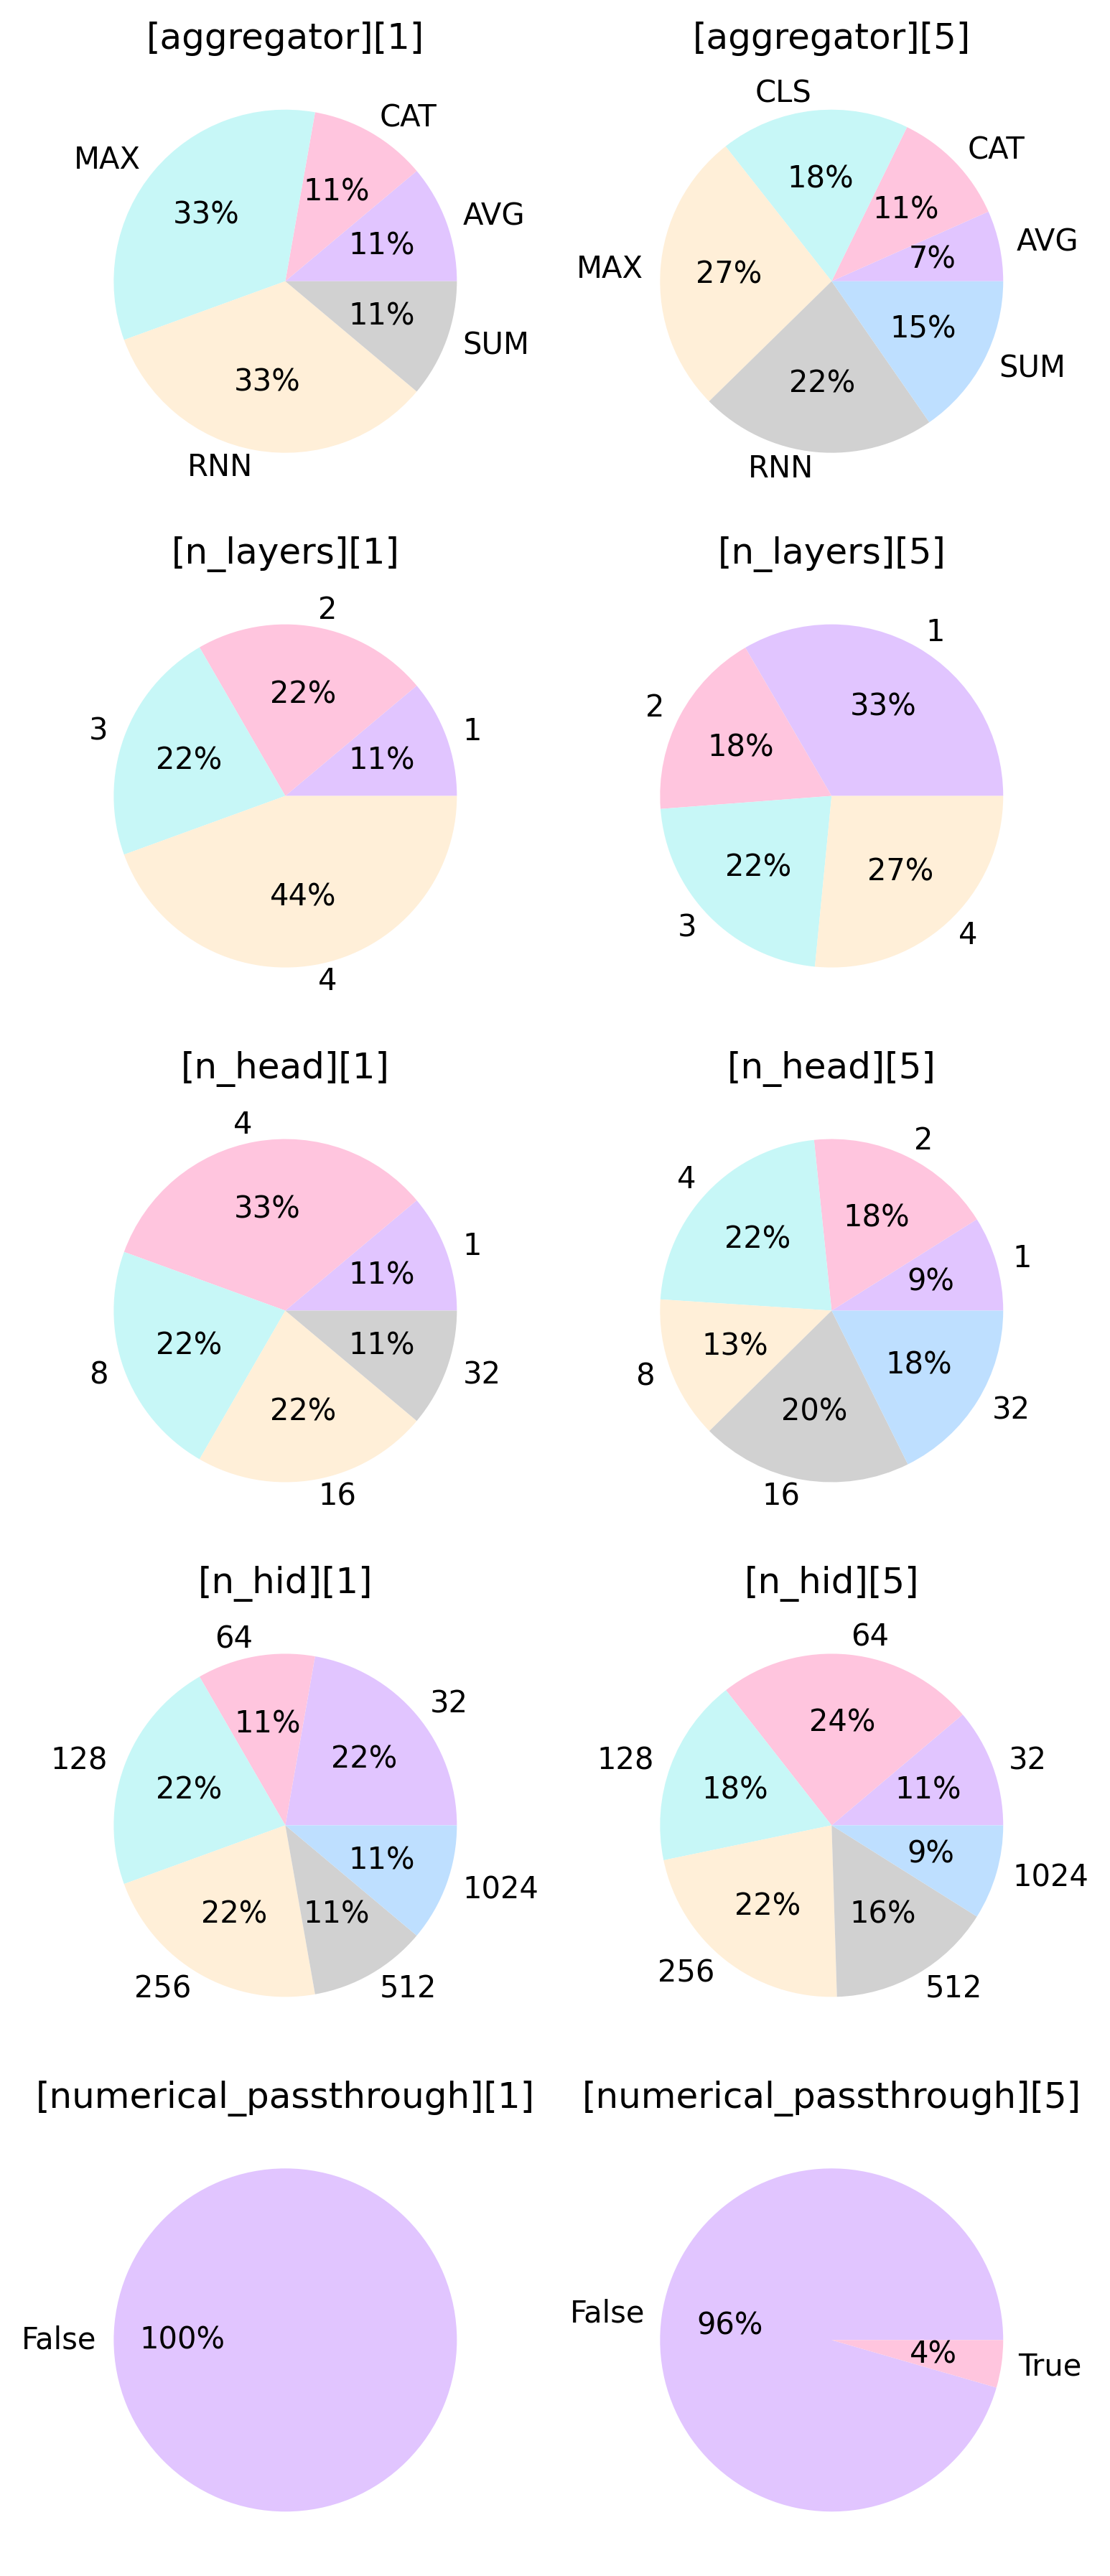

In [6]:
columns_importances = ["aggregator", "n_layers", "n_head", "n_hid", "numerical_passthrough"]
top_k_tests = [1, 5]

fig, axs = plt.subplots(
    len(columns_importances), 
    len(top_k_tests), 
    figsize=(3 * len(top_k_tests), 3 * len(columns_importances))
    )


for top_k_idx, top_k in enumerate(top_k_tests):
    plot_df = results
    plot_df = plot_df \
        .groupby(["dataset"], group_keys=False) \
        .apply(lambda g: g.sort_values(["test_bacc_trial"], ascending=False).head(top_k)) \
        .replace(agg_mapping)

    plot_df["importance"] = plot_df["test_bacc_trial"] / plot_df["test_bacc_ds"]
    plot_df["importance"] = plot_df["importance"] / plot_df["importance"].sum()

    for column_idx, column in enumerate(columns_importances):
        plot_column_df = plot_df \
            .groupby([column], group_keys=False) \
            .sum() \
            .reset_index() 
                
        axs[column_idx, top_k_idx].pie(
            plot_column_df["importance"], 
            labels=plot_column_df[column], 
            colors=["#e1c5ff","#ffc5de","#c7f7f7", "#ffefd8","#d1d1d1","#bedfff"],
            autopct="%.0f%%"
        )

        axs[column_idx, top_k_idx].set_title(f"[{column}][{top_k}]")

## Attention

In [7]:
best_ds_agg = best_results.loc[best_results.groupby("dataset")["test_bacc_trial"].idxmax()][["dataset", "aggregator"]]

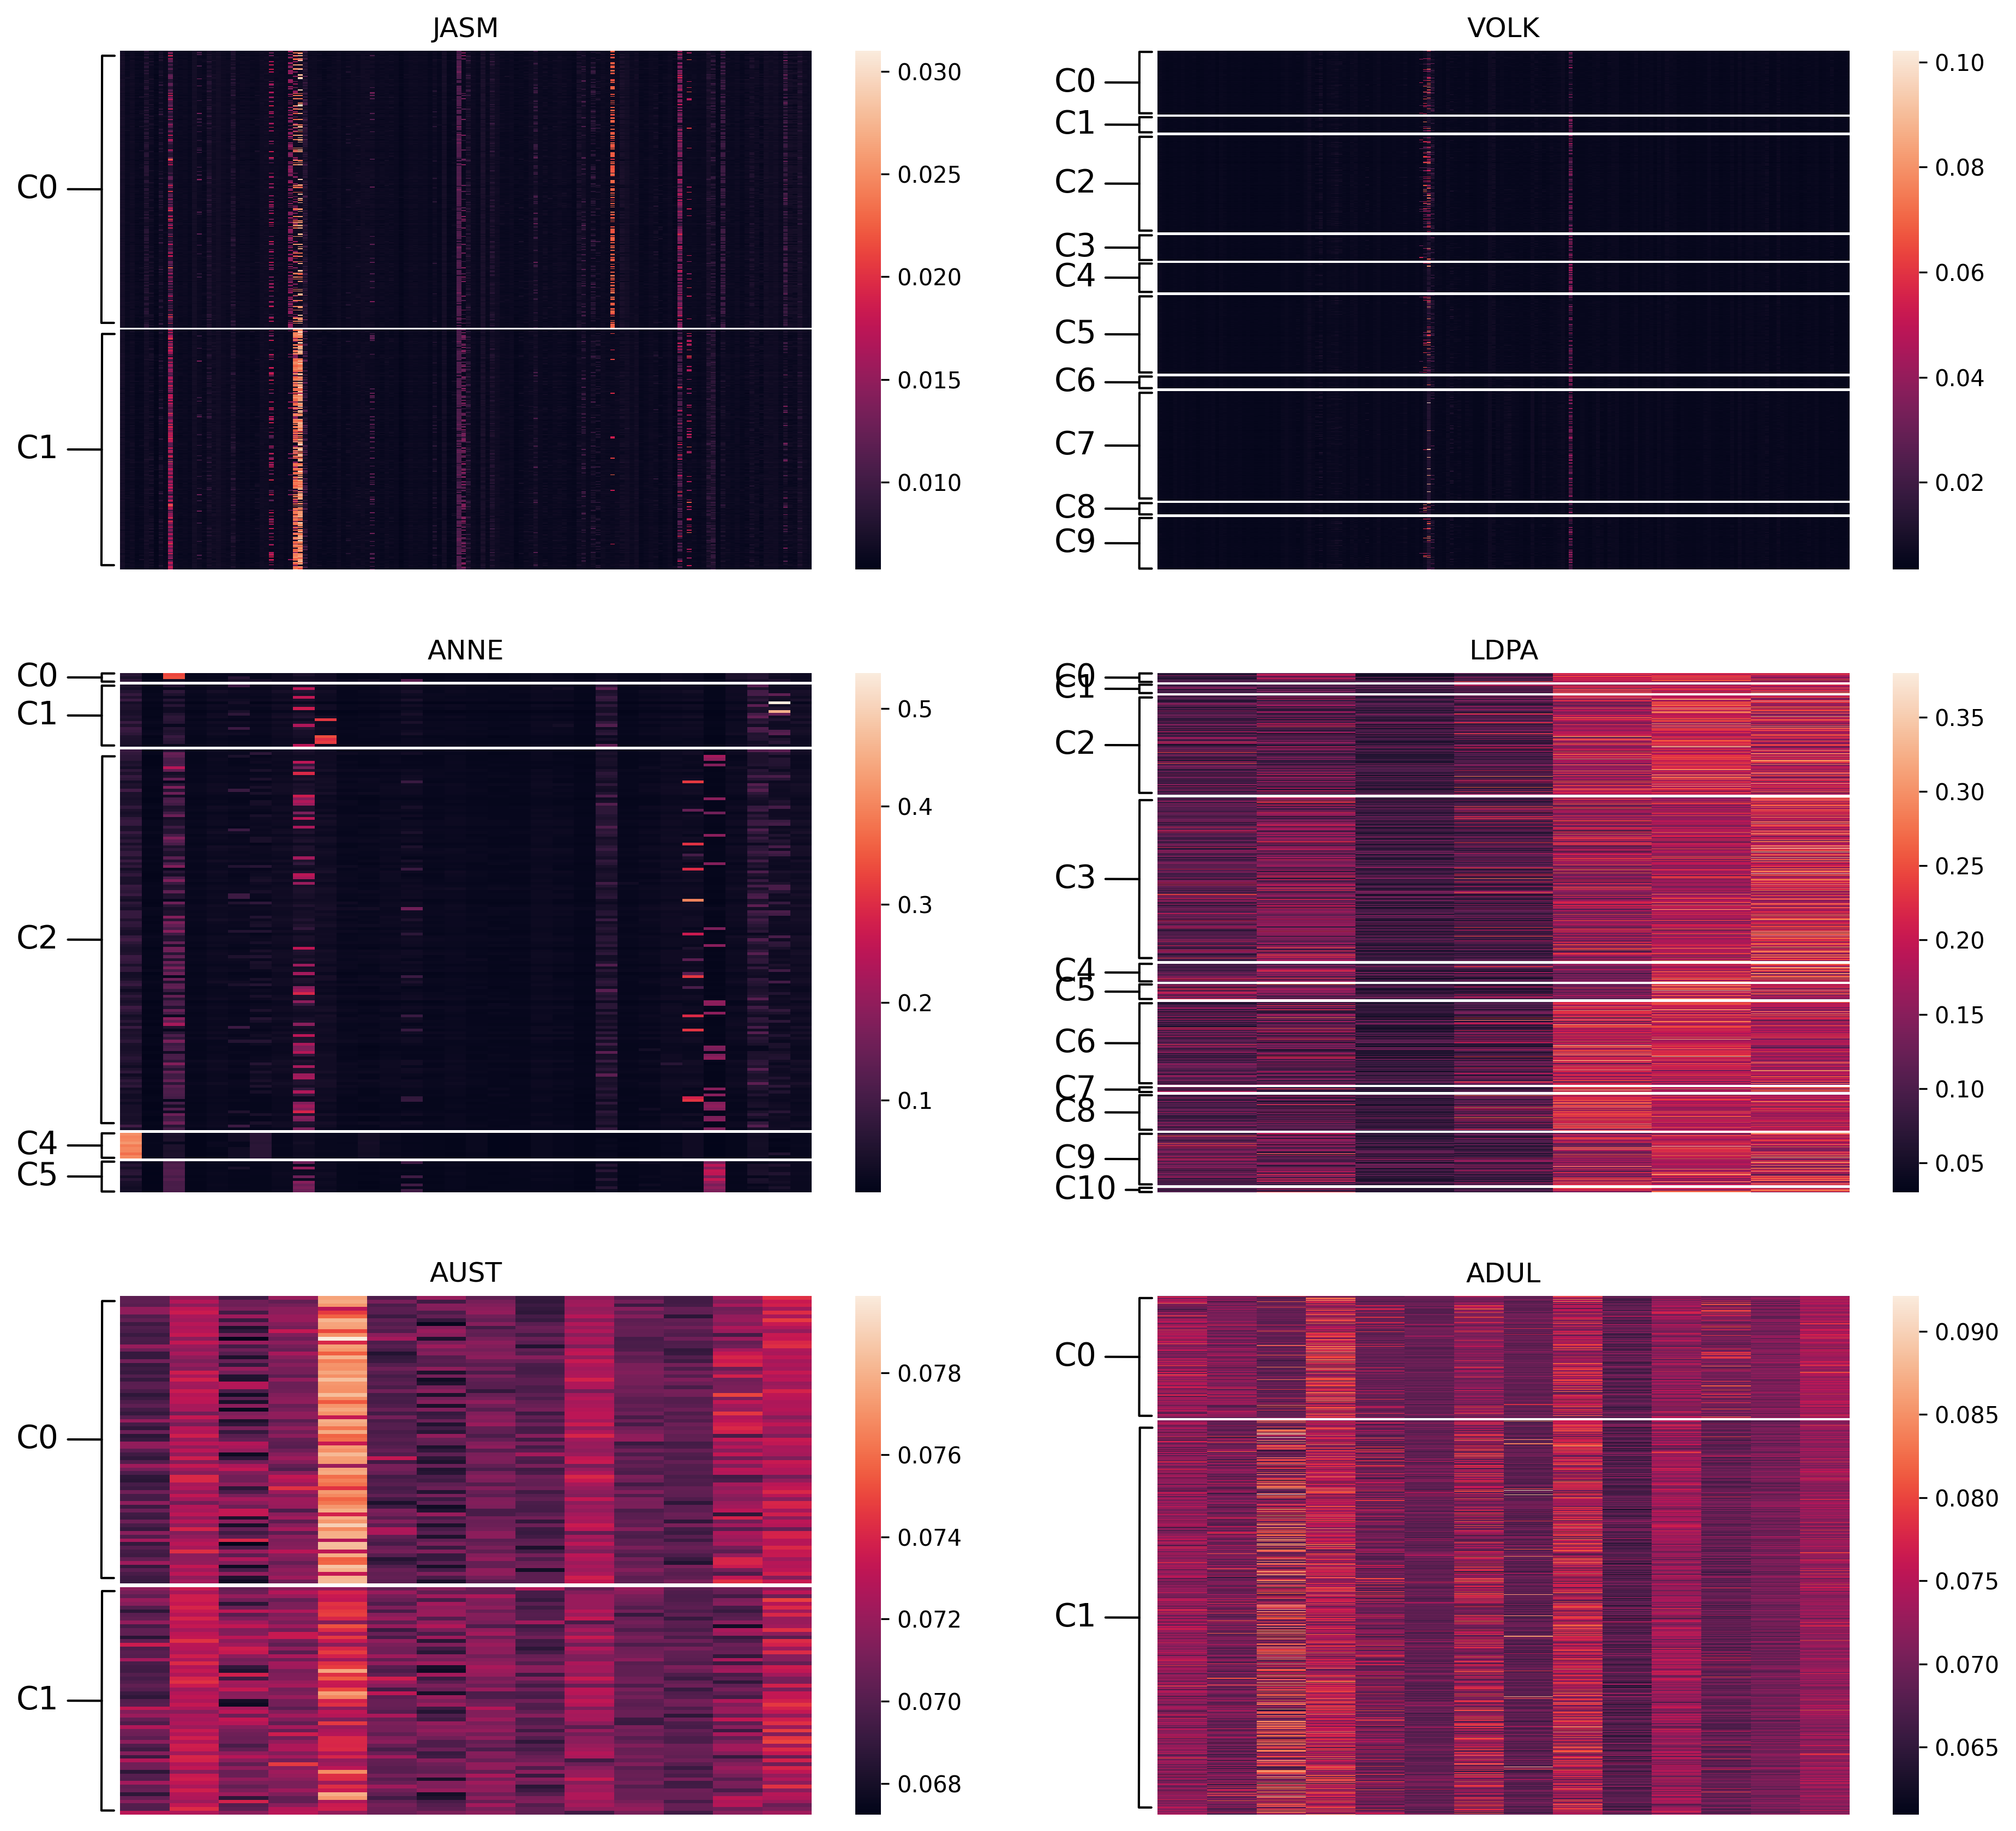

In [8]:
plot_ds = np.array([["jasmine", "volkert"], ["anneal", "ldpa"], ["australian", "adult"]])

fig, axs = plt.subplots(
    plot_ds.shape[0], 
    plot_ds.shape[1], 
    figsize=(5 * plot_ds.shape[0], 7 * plot_ds.shape[1])
)

for ds, ax in zip(plot_ds.flatten(), axs.flatten()):
    agg = best_ds_agg.query("dataset==@ds")["aggregator"].values[0]
    
    folder = f"./attention/{ds}/{agg}/test/"
    attn_file = os.path.join(folder, "attention.npy")

    if not os.path.exists(attn_file):
        raise ValueError(f"{attn_file} does not exists")
    
    with open(attn_file, "rb") as f:
        attn = np.load(f)

    
    labels = attn[:, -1]
    attn_vecs = attn[:, :-1]

    n_features = attn_vecs.shape[1]
    n_instances = attn_vecs.shape[0]
    
    assert np.allclose(attn_vecs.sum(axis=1), 1), "Something went wrong"

    label_argsort = np.argsort(labels)

    attn_vecs = attn_vecs[label_argsort]
    labels = labels[label_argsort]

    assert np.allclose(attn_vecs.sum(axis=1), 1), "Something went wrong"

    attn_vecs_class_sep = attn_vecs.copy()
    unique_labels = np.unique(labels)
    
    n_added_rows = max(1, int(n_instances * 0.005))
    added_rows_offset = 0 
        
    for ul in unique_labels[1:]:
        first_occ_idx = np.argwhere(labels == ul)[0][0]
        first_occ_idx += added_rows_offset
        attn_vecs_class_sep = np.insert(attn_vecs_class_sep, first_occ_idx, np.zeros((n_added_rows, n_features)) + np.nan, axis=0)
        added_rows_offset += n_added_rows
        
    sns.heatmap(attn_vecs_class_sep, ax=ax)  
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.set_axis_off()
    ax.set_title(f"{ds_mapping['dataset'][ds]}")
    
    percent_offset = 0
    fixed_text_offset = -0.017
    
    for ul in np.flip(unique_labels):
        label_percent = np.argwhere(labels == ul).shape[0] / attn_vecs_class_sep.shape[0]
        ax.annotate(
            f"C{int(ul)}", 
            xy=(-0.02, percent_offset + label_percent / 2), 
            xytext=(-0.15, percent_offset + label_percent / 2 + fixed_text_offset),
            xycoords="axes fraction", 
            fontsize=14, 
            #ha="center", 
            #va="bottom",
            #bbox=dict(boxstyle='square', fc='white', coloj='k'),
            arrowprops={
                "arrowstyle": f"-[, widthB={label_percent}, lengthB=0.05",
                "lw": 1.0, 
                "mutation_scale": 110.0
            }
        )
        
        percent_offset += (label_percent + n_added_rows / attn_vecs_class_sep.shape[0])